In [1741]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

import seaborn as sns

import os

In [1637]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample = pd.read_csv("sampleSubmission.csv")

In [1638]:
train_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0       5867    15600392   Amaechi          735    France  Female   53   
1       1939    15594902  Lombardi          518    France    Male   38   
2       4195    15660524        Hu          572   Germany  Female   54   
3       6333    15793046    Holden          619    France  Female   35   
4          2    15647311      Hill          608     Spain  Female   41   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       8  123845.36              2          0               1   
1       3   90957.81              1          0               1   
2       9   97382.53              1          1               1   
3       4   90413.12              1          1               1   
4       1   83807.86              1          0               1   

   EstimatedSalary  Exited  
0        170454.93       1  
1        162304.59       0  
2        195771.95       0  
3         20555.21       0  
4        112542.58       0

In [1639]:
train_df.isna().sum()
test_df.isna().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography          23
Gender              3
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    12
dtype: int64

In [1640]:
test_RowNumber = test_df["RowNumber"]

In [1641]:
train_df.drop(columns=["RowNumber", "CustomerId"], inplace=True)
test_df.drop(columns=["RowNumber", "CustomerId"], inplace=True)

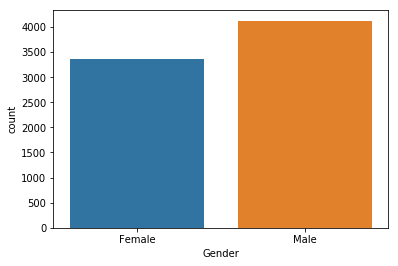

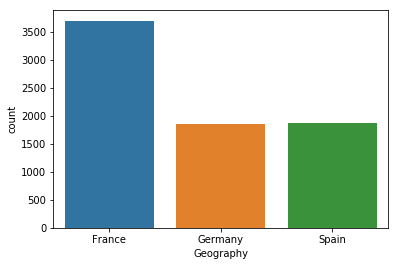

count       7500
unique      2533
top       Martin
freq          25
Name: Surname, dtype: object

In [1642]:
sns.countplot(train_df["Gender"])
plt.show()
sns.countplot(train_df["Geography"])
plt.show()
train_df["Surname"].describe()

In [1643]:
# Primeiro o pais
train_df.fillna({"Geography": "France"}, inplace=True)
test_df.fillna({"Geography": "France"}, inplace=True)

# Agora o gênero
train_df.fillna({"Gender": "Male"}, inplace=True)
test_df.fillna({"Gender": "Male"}, inplace=True)

# Agora o nome
train_df.fillna({"Surname": "Martin"}, inplace=True)
test_df.fillna({"Surname": "Martin"}, inplace=True)

In [1644]:
# Primeiro o pais
mean = train_df["EstimatedSalary"].mean()
train_df.fillna({"EstimatedSalary": mean}, inplace=True)
test_df.fillna({"EstimatedSalary": mean}, inplace=True)

In [1645]:
result = train_df.copy(deep=True)
result = result.append(test_df.copy(deep=True), sort="False")
result.describe()

Age        Balance   CreditScore  EstimatedSalary  \
count  10000.000000   10000.000000  10000.000000     10000.000000   
mean      38.921800   76270.049100    650.528800    101348.530509   
std       10.487806   62429.869460     96.653299     59523.993058   
min       18.000000     -49.998281    350.000000        11.580000   
25%       32.000000       0.000000    584.000000     51581.775000   
50%       37.000000   96986.030000    652.000000    100942.227202   
75%       44.000000  127574.692500    718.000000    149816.520000   
max       92.000000  250898.090000    850.000000    398430.827443   

            Exited    HasCrCard  IsActiveMember  NumOfProducts        Tenure  
count  7500.000000  10000.00000    10000.000000   10000.000000  10000.000000  
mean      0.203733      0.70550        0.515100       1.530200      5.012800  
std       0.402800      0.45584        0.499797       0.581654      2.892174  
min       0.000000      0.00000        0.000000       1.000000      0.000000  
25%       0.000000      0.00000        0.000000       1.000000      3.000000  
50%       0.000000      1.00000        1.000000       1.000000      5.000000  
75%       0.000000      1.00000        1.000000       2.000000      7.000000  
max       1.000000      1.00000        1.000000       4.000000     10.000000

In [1646]:
from sklearn.preprocessing import LabelEncoder

for col in ["Surname"]:
    # Criar o encoder
    encoder = LabelEncoder()
    encoder.fit(result[col])
    
    # Substituir aquela coluna no treino e teste
    train_df[col] = encoder.transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [1647]:
test_df = pd.get_dummies(test_df)
train_df = pd.get_dummies(train_df)

In [1648]:
train_df.head()


Surname  CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0       72          735   53       8  123845.36              2          0   
1     1586          518   38       3   90957.81              1          0   
2     1237          572   54       9   97382.53              1          1   
3     1191          619   35       4   90413.12              1          1   
4     1177          608   41       1   83807.86              1          0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        170454.93       1                 1   
1               1        162304.59       0                 1   
2               1        195771.95       0                 0   
3               1         20555.21       0                 1   
4               1        112542.58       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                0              0            1  
2                  1                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [1649]:
#train_df[["Gender", "Geography", "Surname"]].head()

In [1650]:
result = train_df.copy(deep=True)
result = result.append(test_df.copy(deep=True), sort="False")
result.describe()

Age        Balance   CreditScore  EstimatedSalary  \
count  10000.000000   10000.000000  10000.000000     10000.000000   
mean      38.921800   76270.049100    650.528800    101348.530509   
std       10.487806   62429.869460     96.653299     59523.993058   
min       18.000000     -49.998281    350.000000        11.580000   
25%       32.000000       0.000000    584.000000     51581.775000   
50%       37.000000   96986.030000    652.000000    100942.227202   
75%       44.000000  127574.692500    718.000000    149816.520000   
max       92.000000  250898.090000    850.000000    398430.827443   

            Exited  Gender_Female   Gender_Male  Geography_France  \
count  7500.000000   10000.000000  10000.000000      10000.000000   
mean      0.203733       0.453800      0.546200          0.506900   
std       0.402800       0.497886      0.497886          0.499977   
min       0.000000       0.000000      0.000000          0.000000   
25%       0.000000       0.000000      0.000000          0.000000   
50%       0.000000       0.000000      1.000000          1.000000   
75%       0.000000       1.000000      1.000000          1.000000   
max       1.000000       1.000000      1.000000          1.000000   

       Geography_Germany  Geography_Spain    HasCrCard  IsActiveMember  \
count        10000.00000     10000.000000  10000.00000    10000.000000   
mean             0.24820         0.244900      0.70550        0.515100   
std              0.43199         0.430049      0.45584        0.499797   
min              0.00000         0.000000      0.00000        0.000000   
25%              0.00000         0.000000      0.00000        0.000000   
50%              0.00000         0.000000      1.00000        1.000000   
75%              0.00000         0.000000      1.00000        1.000000   
max              1.00000         1.000000      1.00000        1.000000   

       NumOfProducts       Surname        Tenure  
count   10000.000000  10000.000000  10000.000000  
mean        1.530200   1507.774200      5.012800  
std         0.581654    846.204311      2.892174  
min         1.000000      0.000000      0.000000  
25%         1.000000    773.750000      3.000000  
50%         1.000000   1542.000000      5.000000  
75%         2.000000   2238.250000      7.000000  
max         4.000000   2931.000000     10.000000

In [1651]:
# Separando target e features, vai ser util mais tarde
target = 'Exited'
features = [col for col in train_df.columns if col != target]

In [1652]:
# Criar uma cópia do nosso DataFrame
train_df_normalization = train_df.copy(deep=True)

# Instanciando o objeto que faz a padronização
scaler = MinMaxScaler()

# Fazendo o scaling
scaler.fit(result[features])
train_df_normalization[features] = scaler.transform(train_df_normalization[features])

# Vendo o head do nosso novo Dataframe
train_df_normalization.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Surname  CreditScore       Age  Tenure   Balance  NumOfProducts  \
0  0.024565        0.770  0.472973     0.8  0.493709       0.333333   
1  0.541112        0.336  0.270270     0.3  0.362656       0.000000   
2  0.422040        0.444  0.486486     0.9  0.388258       0.000000   
3  0.406346        0.538  0.229730     0.4  0.360485       0.000000   
4  0.401569        0.516  0.310811     0.1  0.334164       0.000000   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0        0.0             1.0         0.427799       1               1.0   
1        0.0             1.0         0.407342       0               1.0   
2        1.0             1.0         0.491343       0               0.0   
3        1.0             1.0         0.051563       0               1.0   
4        0.0             1.0         0.282444       0               0.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                0.0              0.0            1.0          0.0  
1                0.0              0.0            0.0          1.0  
2                1.0              0.0            1.0          0.0  
3                0.0              0.0            1.0          0.0  
4                0.0              1.0            1.0          0.0

In [1653]:
# Criar uma cópia do nosso DataFrame
test_df_normalization = test_df.copy(deep=True)

# Normaliza
test_df_normalization[features] = scaler.transform(test_df_normalization[features])

# Vendo o head do nosso novo Dataframe
test_df_normalization.head()

Surname  CreditScore       Age  Tenure   Balance  NumOfProducts  \
0  0.621631        0.570  0.216216     0.5  0.393442       0.333333   
1  0.685773        0.814  0.162162     0.3  0.579588       0.000000   
2  0.344592        0.622  0.229730     0.5  0.600824       0.333333   
3  0.200955        0.832  0.459459     0.7  0.368845       0.333333   
4  0.333675        0.360  0.310811     0.4  0.000199       0.333333   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
0        1.0             0.0         0.039460               0.0   
1        0.0             1.0         0.497791               0.0   
2        0.0             1.0         0.285240               0.0   
3        0.0             1.0         0.166112               1.0   
4        0.0             1.0         0.370452               0.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                0.0              1.0            1.0          0.0  
1                0.0              1.0            0.0          1.0  
2                1.0              0.0            1.0          0.0  
3                0.0              0.0            1.0          0.0  
4                0.0              1.0            1.0          0.0

In [1654]:
# Criar uma cópia do nosso DataFrame
train_df_standard = train_df.copy(deep=True)

# Instanciando o objeto que faz a padronização
scaler = StandardScaler()

# Fazendo o scaling
scaler.fit(result[features])
train_df_standard[features] = scaler.transform(train_df_standard[features])

# Vendo o head do nosso novo Dataframe
train_df_standard.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Surname  CreditScore       Age    Tenure   Balance  NumOfProducts  \
0 -1.696808     0.874005  1.342407  1.032908  0.762098       0.807737   
1  0.092448    -1.371246 -0.087897 -0.695982  0.235280      -0.911583   
2 -0.320003    -0.812520  1.437761  1.378686  0.338196      -0.911583   
3 -0.374366    -0.326221 -0.373958 -0.350204  0.226555      -0.911583   
4 -0.390911    -0.440036  0.198164 -1.387538  0.120746      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0  -1.547768        0.970243         1.161042       1          0.986294   
1  -1.547768        0.970243         1.024110       0          0.986294   
2   0.646092        0.970243         1.586388       0         -1.013897   
3   0.646092        0.970243        -1.357391       0          0.986294   
4  -1.547768        0.970243         0.188069       0         -1.013897   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0          -0.574579        -0.569498       1.097093    -1.097093  
1          -0.574579        -0.569498      -0.911499     0.911499  
2           1.740405        -0.569498       1.097093    -1.097093  
3          -0.574579        -0.569498       1.097093    -1.097093  
4          -0.574579         1.755933       1.097093    -1.097093

In [1655]:
# Criar uma cópia do nosso DataFrame
test_df_standard = test_df.copy(deep=True)

test_df_standard[features] = scaler.transform(test_df_standard[features])

# Vendo o head do nosso novo Dataframe
test_df_standard.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Surname  CreditScore       Age    Tenure   Balance  NumOfProducts  \
0  0.371354    -0.160673 -0.469311 -0.004426  0.359036       0.807737   
1  0.593534     1.101634 -0.850726 -0.695982  1.107321      -0.911583   
2 -0.588273     0.108343 -0.373958 -0.004426  1.192686       0.807737   
3 -1.085814     1.194755  1.247053  0.687130  0.260159       0.807737   
4 -0.626091    -1.247084  0.198164 -0.350204 -1.221753       0.807737   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
0   0.646092       -1.030670        -1.438405         -1.013897   
1  -1.547768        0.970243         1.629552         -1.013897   
2  -1.547768        0.970243         0.206789         -1.013897   
3  -1.547768        0.970243        -0.590630          0.986294   
4  -1.547768        0.970243         0.777174         -1.013897   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0          -0.574579         1.755933       1.097093    -1.097093  
1          -0.574579         1.755933      -0.911499     0.911499  
2           1.740405        -0.569498       1.097093    -1.097093  
3          -0.574579        -0.569498       1.097093    -1.097093  
4          -0.574579         1.755933       1.097093    -1.097093

In [1656]:
test_df_normalization.describe()

Surname  CreditScore          Age       Tenure      Balance  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.507035     0.601184     0.280368     0.498280     0.306245   
std       0.289195     0.193439     0.139099     0.288822     0.248932   
min       0.002047     0.000000     0.000000     0.000000     0.000031   
25%       0.259041     0.468000     0.189189     0.200000     0.000199   
50%       0.498806     0.603000     0.256757     0.500000     0.391252   
75%       0.754094     0.738000     0.351351     0.700000     0.507433   
max       0.999659     1.000000     0.905405     1.000000     1.000000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count    2500.000000  2500.000000     2500.000000      2500.000000   
mean        0.174667     0.700400        0.510400         0.257402   
std         0.193666     0.458174        0.499992         0.148507   
min         0.000000     0.000000        0.000000         0.000213   
25%         0.000000     0.000000        0.000000         0.132707   
50%         0.000000     1.000000        1.000000         0.257082   
75%         0.333333     1.000000        1.000000         0.382566   
max         1.000000     1.000000        1.000000         0.935318   

       Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
count       2500.000000        2500.000000        2500.0000    2500.000000   
mean           0.514000           0.253200           0.2328       0.468000   
std            0.499904           0.434932           0.4227       0.499075   
min            0.000000           0.000000           0.0000       0.000000   
25%            0.000000           0.000000           0.0000       0.000000   
50%            1.000000           0.000000           0.0000       0.000000   
75%            1.000000           1.000000           0.0000       1.000000   
max            1.000000           1.000000           1.0000       1.000000   

       Gender_Male  
count  2500.000000  
mean      0.532000  
std       0.499075  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [2303]:
x_train, x_val, y_train, y_val = train_test_split(train_df_normalization.drop(columns="Exited"), 
                                                  train_df_normalization["Exited"], test_size=0.25)

In [1607]:
x_train, x_val, y_train, y_val = train_test_split(train_df_standard.drop(columns="Exited"), 
                                                  train_df_standard["Exited"], test_size=0.25, random_state=654)

In [2304]:
# Treinar
model = KNeighborsClassifier(n_neighbors=16)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [2305]:
y_preds_val = model.predict_proba(x_val)[:, 1]
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.7674424733052947


In [1788]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [1789]:
y_pred_val = model.predict(x_val)
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.7375245762711864


In [2308]:
model = RandomForestClassifier(n_estimators=200, max_depth=9, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [2309]:
y_preds_val = model.predict_proba(x_val)[:, 1]
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.8682077390928544


In [2310]:
model = LogisticRegression(random_state=0, solver='sag', class_weight="balanced", max_iter=1000, multi_class="multinomial")
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [2311]:
y_preds_val = model.predict_proba(x_val)[:, 1]
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.7724370799031648


In [2316]:
#Arvore apurada sem nada random
model = DecisionTreeClassifier(max_depth=9, splitter='best', min_samples_split=216, presort=True, criterion='entropy')
model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=216,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

In [2317]:
y_preds_val = model.predict_proba(x_val)[:, 1]
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.8539556300442365


In [2321]:
result_val = 0
while(result_val<0.850):
    model = DecisionTreeClassifier(max_depth=7, splitter='random', presort=True, criterion='entropy', min_samples_split=54)
    model.fit(x_train, y_train)
    y_preds_val = model.predict_proba(x_val)[:, 1]
    result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.8601290551532463


In [2322]:
y_preds_val = model.predict_proba(x_val)[:, 1]
result_val = roc_auc_score(y_val, y_preds_val)
print(result_val)

0.8601290551532463


In [876]:
#model = DecisionTreeClassifier(max_depth=5)
#model.fit(train_df_normalization.drop(columns=["Exited"]), train_df_normalization["Exited"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1461]:
y_preds_test = model.predict_proba(test_df_normalization)[:, 1]

In [1464]:
y_preds_test

array([0.1248074 , 0.05725191, 0.1248074 , ..., 0.62222222, 0.109375  ,
       0.1248074 ])

In [1465]:
sample["Exited"] = y_preds_test

In [1466]:
sample.to_csv("Arvore087200.csv", index=False)